In [21]:
from benlp.llms import Chat
from benlp.tools.code_executor import CodeExecutor, execute_code
import io
import contextlib
from benlp.utils import parse_code_blocks

Reponse Sure! Here's an example of Python code to model an iron condor strategy using historical stock price data and plot the results:

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
stock_price = 100 + np.cumsum(np.random.normal(0, 1, 100))

# Define iron condor parameters
strike_price_put = 90
strike_price_call = 110
put_width = 5
call_width = 5
premium = 3

# Calculate profit and loss at expiration
profit_loss = np.where(stock_price < strike_price_put - put_width, premium,
                       np.where(stock_price > strike_price_call + call_width, premium,
                                np.where(np.logical_and(stock_price >= strike_price_put, stock_price <= strike_price_put + put_width),
                                         strike_price_put + put_width - stock_price - premium,
                                         np.where(np.logical_and(stock_price <= strike_price_call, stock_price >= strike_price_call - call_width

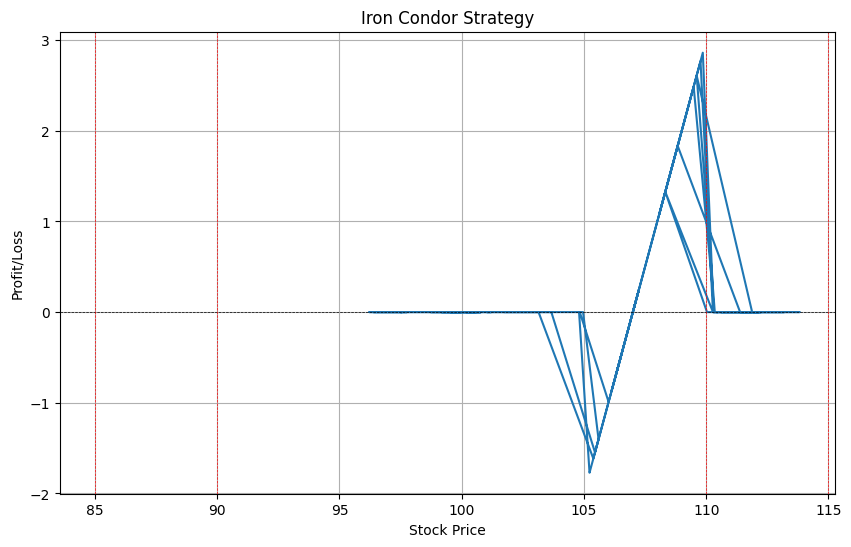

Output 


In [22]:
chat = Chat(model='gpt-3.5-turbo-0613')

prompt = """Write python code to model an iron condor strategy and plot the results. Create some example data"""
res = chat(prompt)['response']
print("Reponse", res)
code = parse_code_blocks(res)[0]
output = execute_code(code)
print("Output", output)

Reponse Sure! I can help you with that. Here's an example Python code that models an iron condor strategy using both the Black-Scholes and binomial models, and plots the results using the Matplotlib library:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
strike_price = 100
volatility = 0.2
risk_free_rate = 0.05
time_to_maturity = 1
dividend_yield = 0
initial_price = 100

# Generate example data
num_steps = 100
dt = time_to_maturity / num_steps
S = np.zeros(num_steps)
S[0] = initial_price

# Black-Scholes model
for i in range(1, num_steps):
    z = np.random.standard_normal()
    S[i] = S[i-1] * np.exp((risk_free_rate - dividend_yield - (volatility**2)/2) * dt + volatility * np.sqrt(dt) * z)

# Calculate option prices using Black-Scholes model
d1 = (np.log(S / strike_price) + (risk_free_rate - dividend_yield + (volatility**2)/2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
d2 = d1 - volatility * np.sqrt(time_to_

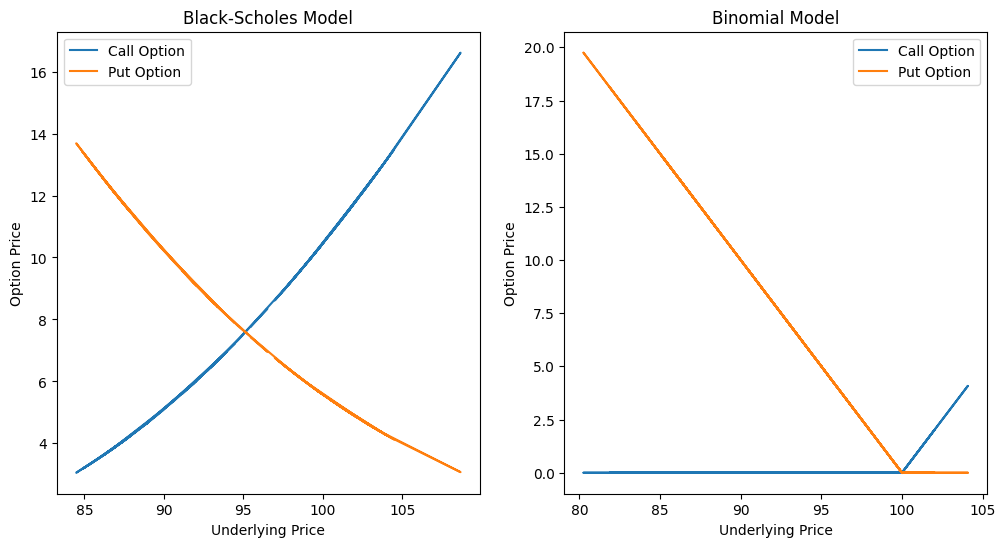

Output 


In [7]:
chat = Chat(model='gpt-3.5-turbo-0613')

prompt = """
    I need you to help me write some python code to model an iron condor strategy and plot the results. Create some example data and use black scholes to model the price of the underlying. Then, do a second one with the binomial model. Use the following parameters:
    - strike price: 100
    - volatility: 0.2
    - risk free rate: 0.05
    - time to maturity: 1
    - dividend yield: 0
    - initial price: 100

    Output 2 charts for each. Output python in a single code block, it will be executed and the output will be saved to a file.
"""
res = chat(prompt)['response']
print("Reponse", res)
code = parse_code_blocks(res)[0]
output = execute_code(code)
print("Output", output)

In [16]:
system_message = """You are PythonGPT, a helpful assistant that is connected with a python interpreter.
You provide accurate and helpful answers to questions about python code. You always write python code that is syntactically correct. Your JSON is always output in a valid schema. You can use the function "python" to execute python code.
"""

chat = Chat(model='gpt-4-0613', system_message=system_message)

prompt = """
    You have been retained as a consultant by a business “Chastain HoldCo” that is considering production of a 10 products in three corporate divisions. For each product, you are given the price and quantity sold per month for each product the unit variable cost for each product and the fixed cost for producing each product. The "Product Fixed Cost" must be born if the product is produce that month. Division Product Line Price Quantity Product Unit Var Cost Product Line Fixed Cost 1 1 11 20 5 20 1 2 13 10 3 20 1 3 4 5 2 50 2 4 14 10 4 10 2 5 4 10 3 30 2 6 4 10 2 140 2 7 8 20 4 50 3 8 12 7 2 35 3 9 7 10 5 10 3 10 13 5 3 15

    Output python in a single code block, it will be executed and the output will be saved to a file.
"""
res = chat(prompt)['response']
print("First Reponse:\n\n", res)
code = parse_code_blocks(res)[0]
if code != []:
    output = execute_code(code)
    print("Output of code:\n\n", output)
    res2 = chat("Here is the output: " + output + "Craft a final response.")['response']
print("Final Response:\n\n", res2)

First Reponse:

 You have provided the information for each product in a single line of text. It would be much easier to process this information if it was structured in a more organized manner. However, I have tried my best to extract the information and represent it in a Python data structure.

Here's the Python code:

```python
# Products data
products = [
    {"Division": 1, "Product Line": 1, "Price": 11, "Quantity": 20, "Product Unit Var Cost": 5, "Product Line Fixed Cost": 20},
    {"Division": 1, "Product Line": 2, "Price": 13, "Quantity": 10, "Product Unit Var Cost": 3, "Product Line Fixed Cost": 20},
    {"Division": 1, "Product Line": 3, "Price": 4, "Quantity": 5, "Product Unit Var Cost": 2, "Product Line Fixed Cost": 50},
    {"Division": 2, "Product Line": 4, "Price": 14, "Quantity": 10, "Product Unit Var Cost": 4, "Product Line Fixed Cost": 10},
    {"Division": 2, "Product Line": 5, "Price": 4, "Quantity": 10, "Product Unit Var Cost": 3, "Product Line Fixed Cost": 30},
 

In [19]:
from pulp import LpProblem, LpMaximize, LpVariable, LpStatus, value

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Example_Problem", LpMaximize)

# Create problem variables
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

# The objective function is added to 'prob' first
prob += 3*x1 + 2*x2, "Total Profit"

# The two constraints are entered
prob += x1 + x2 <= 100, "constraint1"
prob += x1 + 2*x2 <= 150, "constraint2"

# The problem data is written to an .lp file
prob.writeLP("ExampleProblem.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with its resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Total Profit = ", value(prob.objective))

# Print the shadow prices for each constraint
o = [{'name': name, 'shadow price': c.pi, 'slack': c.slack} for name, c in prob.constraints.items()]
for i in o:
    print('Constraint:', i['name'])
    print('Shadow price:', i['shadow price'])
    print('Slack:', i['slack'])
    print()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/beneverman/Documents/Coding/benlp_v1/venv/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6t/m1cj5jqd1cx9xq5bxs_h3g200000gn/T/f746ff857462481a8dfd5ee214006d26-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/6t/m1cj5jqd1cx9xq5bxs_h3g200000gn/T/f746ff857462481a8dfd5ee214006d26-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 4.9999998 (2)
0  Obj -0 Dual inf 4.9999998 (2)
1  Obj 300
Optimal - objective value 300
Optimal objective 300 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       

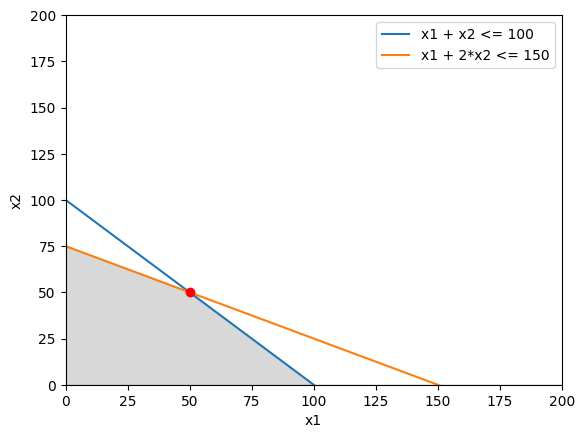

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
x = np.linspace(0, 200, 500)
y1 = 100 - x
y2 = (150 - x) / 2

# Create the plot
plt.figure()
plt.plot(x, y1, label='x1 + x2 <= 100')
plt.plot(x, y2, label='x1 + 2*x2 <= 150')
plt.xlim((0, 200))
plt.ylim((0, 200))
plt.xlabel('x1')
plt.ylabel('x2')

# Add some shading
y3 = np.minimum(y1, y2)
plt.fill_between(x, 0, y3, alpha=0.3, color='gray')

# Add the optimal solution
plt.plot(50, 50, 'ro')  # replace 50, 50 with the actual optimal solution

# Add a legend
plt.legend()

# Show the plot
plt.show()